In [1]:
from pickle import load
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load a files
def load_clean_sentences(filename):
    return load(open(filename, 'rb'))


In [3]:
# English
eng_file = 'data/colab/English_tokens.pkl'
eng_tokens = load_clean_sentences(eng_file)

In [4]:
# German
ger_file = 'data/colab/German_tokens.pkl'
ger_tokens = load_clean_sentences(ger_file)


In [5]:
# Model
model_file = 'model_4.h5'
model = load_model(model_file, compile=False)


In [17]:
## Loss
train_loss = load_clean_sentences('data/colab/loss.pkl')
test_loss = load_clean_sentences('data/colab/val_loss.pkl')

In [21]:
print(train_loss[-1],test_loss[-1])

0.13679064810276031 1.5437448024749756


In [24]:
print(train_accuracy[-1],test_accuracy[-1])

0.9784583449363708 0.8037777543067932


In [22]:
## Accuracy
train_accuracy = load_clean_sentences('data/colab/accuracy.pkl')
test_accuracy = load_clean_sentences('data/colab/val_accuracy.pkl')

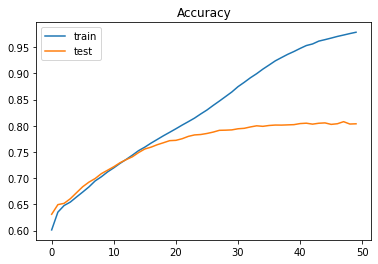

In [23]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['train','test'])
plt.title('Accuracy')
plt.show()

In [6]:
def input_to_array(word):
    word_list = word.split()

    word_list = [word.lower() for word in word_list]
    punct_remove = []

    for txt in word_list:
        word_input = "".join(u for u in txt if u not in ("?", ".", ";", ":", "!"))
        punct_remove.append(word_input)
    
    output_array = np.zeros(5)
    for i in range(len(punct_remove)):
        for key, value in eng_tokens.word_index.items():
            if key == punct_remove[i]:
                np.put(output_array, i, value)
            else:
                pass
    output_array = output_array.astype(int)
    output_array = output_array.reshape(1, 5)
    
    return output_array

In [7]:
def process_output(input_array, tokenizer):
    pred_value = model.predict_classes(input_array)

    vals = []
    for i in pred_value[0]:
        for word, index in tokenizer.word_index.items():
            if index == i:
                worrdd = word
                vals.append(worrdd)

    output = ' '.join(vals)
    return output


In [8]:
flag = True

while(flag == True):
    input_english = input('Enter a text in English : ')
    if( input_english != '123'):
        input_array1 = input_to_array(input_english)
        decode_sequence = process_output(input_array1, ger_tokens)
        print("Output French : ", decode_sequence)
    else:
        flag = False

Enter a text in English : Hello
Output French :  hallo
Enter a text in English : How are you
Output French :  wie geht dir
Enter a text in English : 123
